### Importing Libraries.

In [86]:
# Pandas: This librarie will used to create and work with dataframes.
import pandas as pd 
# Matplotlib: Used to plot graphics. 
import matplotlib.pyplot as plt
# Seaborn: Used to better style and iprove graphics. 
import seaborn as sns
#Tweepy: Used to work with the Twitter API.
import tweepy as tw
#ConfigParser: Used to get credentials for the twitter API.
import configparser as cp
#NLTK its used to pre-proccess text and regex its used to filter that text.
import nltk, re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()
#Library to count words
from collections import Counter
# library to bluid wordclouds
from wordcloud import WordCloud
# NLTK to analice sentiment. 
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Importing and authenticating API credentials from the config file. 

In [87]:
config =  cp.ConfigParser()
config.read("config.ini")

api_key = config["twitter"]["api_key"]
api_key_secret = config["twitter"]["api_key_secret"]
access_token = config["twitter"]["access_token"]
access_token_secret = config["twitter"]["access_token_secret"]

# Authentication

auth = tw.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

### Funtions to work with in this project.

In [95]:

# Function to perform data extraction from twitter.
def scrape(words, date_since, numtweet):
# We are using .Cursor() to search
# through twitter for the required tweets.
# The number of tweets can be
# restricted using .items(number of tweets)
    tweets = tw.Cursor(api.search_tweets,
                               words, lang="en",
                               since_id=date_since,
                               tweet_mode='extended').items(numtweet)
# .Cursor() returns an iterable object. Each item in
# the iterator has various attributes
# that you can access to
# get information about each tweet
    list_tweets = [tweet for tweet in tweets]
 
# we will iterate over each tweet in the
# list for extracting information about each tweet
    columns=['tweet_date','tweets']
    data = []
    for tweet in list_tweets:
        tweet_date = tweet.created_at
# Retweets can be distinguished by
# a retweeted_status attribute,
# in case it is an invalid reference,
# except block will be executed
        try:
            tweets = tweet.retweeted_status.full_text
        except AttributeError:
            tweets = tweet.full_text
            data.append([tweet_date, tweets])
# Creating DataFrame using pandas
    df = pd.DataFrame(data, columns=columns)
    return df 

#Functions to preproccess text.
def get_part_of_speech(word):
  probable_part_of_speech = wordnet.synsets(word)
  pos_counts = Counter()
  pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
  pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
  pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
  pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech

def preprocess_text(text):
  cleaned = re.sub(r'(\W+)|(http\S+)', ' ', text).lower()
  tokenized = word_tokenize(cleaned)
  normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized if token not in stop_words]
  return normalized

# Cleaning text. 
def clean_text(text):
  cleaned = re.sub(r'(\W+)|(http\S+)', ' ', text).lower()
  return cleaned

# Funtion to bluid and plot a WordCloud.
def wordcloud(str):
    wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(str))
#plot the wordcloud object
    plt.figure(figsize = (8,8))
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    plt.show()

#Sentiment finder
def sentiment(text):
    score = sia.polarity_scores(text)
    pos = score["pos"]
    neg = score["neg"]
    if pos > neg:
        sentiment = "positive"
    elif neg > pos:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    return sentiment


### Getting the data from twitter.

In [89]:
tesla = scrape("Tesla", 2022-0o1-0o1, 20)
ford = scrape("Ford", 2022-0o1-0o1, 20)

### Preproccessing the data for further analisys.

In [90]:
tesla_preprocess = preprocess_text("".join(tesla.tweets))
ford_preprocess = preprocess_text("".join(ford.tweets))
tesla_preprocess

['elonmusk',
 'mean',
 'get',
 'go',
 'think',
 'able',
 'tell',
 'run',
 'company',
 'essentially',
 'thing',
 'case',
 'think',
 'tesla',
 'drop',
 'price',
 '5k',
 'start',
 'need',
 'electric',
 'vehicle',
 'eternlenotes',
 'tesla',
 'grimezsz',
 'paranoia',
 'strike',
 'deep',
 'wholemarsblog',
 'elonmusk',
 'make',
 'tesla',
 'unobtainable',
 'common',
 'person',
 'badobsessionmsp',
 'watch',
 'superfast',
 'tesla',
 'jag',
 'build',
 'tlnd420',
 'real_indiankong',
 'sawyermerritt',
 'think',
 'get',
 'catch',
 'semantics',
 'agree',
 'understand',
 'term',
 'use',
 'mean',
 'however',
 'look',
 'tesla',
 'website',
 'also',
 'section',
 'use',
 'tesla',
 'exact',
 'mileage',
 'use',
 'look',
 'exist',
 'inventory',
 'sdmaundu',
 'kkiptum',
 'tesla',
 'build',
 'car',
 'customer',
 'ask',
 'charge',
 'range',
 'anxiety',
 'fast',
 'charge',
 'supercharger',
 'key',
 'assure',
 'folk',
 'stick',
 'evandchill',
 'tesla',
 'range',
 'charge',
 'availability',
 'fbi',
 'feral',
 'hog

### Counting words with bag of words

In [91]:
tesla_bow = Counter(tesla_preprocess)
ford_bow = Counter(ford_preprocess)

print("\nThen most frequent words and number of occurrences for Tesla according to Bag-of-Words:")
most_common_tesla = tesla_bow.most_common(10)
print(most_common_tesla)
print("\nTen most frequent words and number of occurrences for Ford according to Bag-of-Words:")
most_common_ford = ford_bow.most_common(10)
print(most_common_ford)


Then most frequent words and number of occurrences for Tesla according to Bag-of-Words:
[('tesla', 9), ('think', 3), ('use', 3), ('charge', 3), ('elonmusk', 2), ('mean', 2), ('get', 2), ('build', 2), ('look', 2), ('car', 2)]

Ten most frequent words and number of occurrences for Ford according to Bag-of-Words:
[('ford', 8), ('like', 4), ('get', 3), ('one', 2), ('use', 2), ('fund', 2), ('mean', 2), ('must', 2), ('say', 2), ('enough', 2)]


### Building a WordCloud

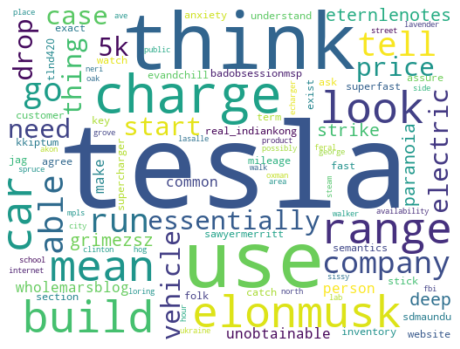

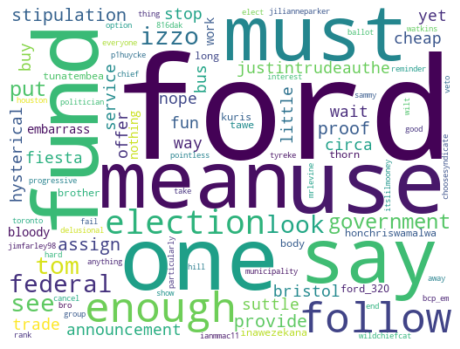

In [92]:
tesla_wordcloud = wordcloud(tesla_preprocess)
ford_wordcloud = wordcloud(ford_preprocess)

### Finding the sentiment of each tweet using nltk SentimentIntensityAnalyzer

In [99]:
# In this case we just need to clean the data and create a new column with it.
tesla["clean_tweet"] = tesla["tweets"].apply(clean_text)
ford["clean_tweet"] = ford["tweets"].apply(clean_text)
# Now we can apply the sentiment function and crrate a new column with it.
tesla["sentiment"] = tesla["clean_tweet"].apply(sentiment)
ford["sentiment"] = ford["clean_tweet"].apply(sentiment)
ford

,tweet_date,tweets,clean_tweet,sentiment
0,2022-03-25 17:55:24+00:00,Did any one get that tom Izzo look’s like me h...,did any one get that tom izzo look s like me,positive
1,2022-03-25 17:55:21+00:00,@CP24 Ford won't use these funds for what they...,cp24 ford won t use these funds for what they...,positive
2,2022-03-25 17:55:20+00:00,The stop announcements on the M bus in Bristol...,the stop announcements on the m bus in bristol...,negative
3,2022-03-25 17:55:20+00:00,This fun. I'm waiting for my cheap little Ford...,this fun i m waiting for my cheap little ford ...,positive
4,2022-03-25 17:55:10+00:00,this and o*ford how embarrassing all the blood...,this and o ford how embarrassing all the blood...,negative
5,2022-03-25 17:55:06+00:00,@HonChrisWamalwa TUNATEMBEA !! \nKURIS TAWE !!...,honchriswamalwa tunatembea kuris tawe ford ha...,neutral
6,2022-03-25 17:55:03+00:00,@FORD_320 Yours brother.,ford_320 yours brother,neutral
7,2022-03-25 17:54:57+00:00,@JilianneParker @Ford @jimfarley98 @mrlevine @...,jilianneparker ford jimfarley98 mrlevine ford...,negative
8,2022-03-25 17:54:56+00:00,@p1huycke Ford canceled Toronto's election and...,p1huycke ford canceled toronto s election and...,positive
9,2022-03-25 17:54:51+00:00,@ChooseSyndicate Wilt,choosesyndicate wilt,neutral
